# Import libraries and dataset

In [25]:
import numpy as np
import pandas as pd
import wget
import matplotlib.pyplot as plt
import seaborn as sns
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data"
wget.download(data_url,'crx.csv')
crx_base = pd.read_csv("crx.csv", names = ["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10","A11","A12","A13","A14","A15","A16"] )
crx_base.replace('?', np.NaN, inplace = True)

100% [..............................................................................] 32218 / 32218

# A)   Understanding the DataFrame

### 1. Check the shape and contents

In [13]:
crx_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A1     678 non-null object
A2     678 non-null object
A3     690 non-null float64
A4     684 non-null object
A5     684 non-null object
A6     681 non-null object
A7     681 non-null object
A8     690 non-null float64
A9     690 non-null object
A10    690 non-null object
A11    690 non-null int64
A12    690 non-null object
A13    690 non-null object
A14    677 non-null object
A15    690 non-null int64
A16    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


### 2. 	Select & print few rows

In [3]:
crx_base.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [26]:
crx_base.A2 = pd.to_numeric(crx_base.A2)

In [4]:
crx_base.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0,-


In [5]:
crx_base.head(3)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.00,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.50,u,g,q,h,1.50,t,f,0,f,g,00280,824,+


crx_base.tail(3)
crx_base[:2]
crx_base[-2:]

### 3. 	Basic summary statistics

In [9]:
crx_base.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [15]:
crx_base.describe()

,A2,A3,A8,A11,A15
count,678.000000,690.000000,690.000000,690.00000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,1017.385507
std,11.957862,4.978163,3.346513,4.86294,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,395.500000
max,80.250000,28.000000,28.500000,67.00000,100000.000000


### 4. 	Frequency Distribution of variables

In [16]:
# single variable: Categorical
crx_base.A1.value_counts()

b    468
a    210
Name: A1, dtype: int64

In [17]:
# all categorical variables
df_o = [x for x in crx_base.columns if crx_base[x].dtype == 'O']
df_n = [x for x in crx_base.columns if crx_base[x].dtype != 'O']
for column in df_o:
    print( crx_base[column].value_counts() )

b    468
a    210
Name: A1, dtype: int64
u    519
y    163
l      2
Name: A4, dtype: int64
g     519
p     163
gg      2
Name: A5, dtype: int64
c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
r       3
Name: A6, dtype: int64
v     399
h     138
bb     59
ff     57
j       8
z       8
dd      6
n       4
o       2
Name: A7, dtype: int64
t    361
f    329
Name: A9, dtype: int64
f    395
t    295
Name: A10, dtype: int64
f    374
t    316
Name: A12, dtype: int64
g    625
s     57
p      8
Name: A13, dtype: int64
00000    132
00200     35
00120     35
00160     34
00100     30
        ... 
00117      1
00043      1
00395      1
00029      1
00239      1
Name: A14, Length: 170, dtype: int64
-    383
+    307
Name: A16, dtype: int64


In [18]:
#  single variable: numeric
crx_base.A11.value_counts().sort_index()

0     395
1      71
2      45
3      28
4      15
5      18
6      23
7      16
8      10
9      10
10      8
11     19
12      8
13      1
14      8
15      4
16      3
17      2
19      1
20      2
23      1
40      1
67      1
Name: A11, dtype: int64

In [19]:
# multi-variable
pd.crosstab(crx_base.A9, [crx_base.A10, crx_base.A13], margins = True)

A10    f           t     All
A13    g  p   s    g  s     
A9                          
f    220  8  34   65  2  329
t    113  0  20  227  1  361
All  333  8  54  292  3  690

In [20]:
pd.crosstab(crx_base.A9, [crx_base.A10, crx_base.A13] , normalize = True )

A10         f                             t          
A13         g         p         s         g         s
A9                                                   
f    0.318841  0.011594  0.049275  0.094203  0.002899
t    0.163768  0.000000  0.028986  0.328986  0.001449

we can have percentage view across rows / columns
pd.crosstab(crx_base.A9, [crx_base.A10, crx_base.A13] , normalize = 'index' )
pd.crosstab(crx_base.A9, [crx_base.A10, crx_base.A13] , normalize = 'columns' )

(3.0, -1.0)

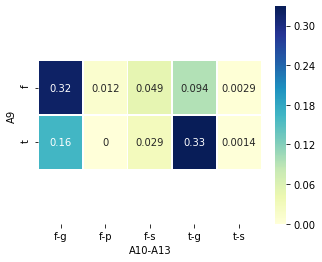

In [27]:
plt.figure(figsize=(5, 4))
sns.heatmap( pd.crosstab(crx_base.A9, [crx_base.A10, crx_base.A13] , normalize = True ) ,cmap="YlGnBu", linewidths=.5, annot=True, cbar=True )
bottom, top = plt.ylim()
plt.ylim(bottom + 1.5, top - 1.5)

In [ ]:
# frequency distribution of Numeric variables

### 5. 	Sort DataFrame

In [28]:
crx_base.sort_values(['A1','A5','A6','A7','A11'],ascending = True, inplace = True)

# B)  Manipulation: Level1 (Select & Rename)

### 1. 	Remove Duplicates

In [29]:
# sum duplicates across all variables
crx_base.duplicated( keep = 'last').sum()

0

In [30]:
# sum duplicates across selected few
crx_base.duplicated( [ 'A6','A7','A13' ], keep = 'last').sum()

620

In [34]:
# drop duplicate values
crx_base.drop_duplicates( keep = 'first', inplace = True)
len(crx_base)

690

In [36]:
crx_base1 = crx_base.drop_duplicates(['A6','A7','A13'], keep = 'first')
len(crx_base1)

70

### 2. 	Drop and select variables 

In [39]:
crx_base1 = crx_base[['A1','A2','A3','A4']]
len(crx_base.columns) , len(crx_base1.columns)

(16, 4)

In [40]:
crx_base1 = crx_base.filter( df_o , axis = 1 )
len(crx_base.columns) , len(crx_base1.columns)

(16, 11)

In [41]:
crx_base1 = crx_base.drop( df_n , axis = 1 )
len(crx_base.columns) , len(crx_base1.columns)

(16, 11)

In [42]:
crx_base1 = crx_base.filter(regex = "1")
crx_base1.columns

Index(['A1', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16'], dtype='object')

Ends in 1 : crx_base1 = crx_base.filter(regex = "1$")
Starts with A1 : crx_base1 = crx_base.filter(regex = "^A1")
Starts with A and ends with 2 to 5 : crx_base1 = crx_base.filter(regex = "^A[2-5]$")
Contains either 2 or 3 : crx_base1 = crx_base.filter(regex = "2|3")

In [43]:
crx_base1 = crx_base.loc[:,'A5':'A10']
crx_base1.columns

Index(['A5', 'A6', 'A7', 'A8', 'A9', 'A10'], dtype='object')

In [44]:
crx_base1 = crx_base.iloc[:,4:10]
crx_base1.columns

Index(['A5', 'A6', 'A7', 'A8', 'A9', 'A10'], dtype='object')

### 3.  	Conditional dropping and selecting rows

In [48]:
crx_base1 = crx_base[(crx_base.A1 == 'a') | (crx_base.A1 == 'b') ]
len(crx_base1)

678

In [50]:
crx_base1 = crx_base.query("A1 in ['a','b'] ")
len(crx_base1)

678

In [52]:
crx_base1 = crx_base.query("A1 == 'a' & A11 != 6 ")
len(crx_base1)

203

In [53]:
# Select all numeric variable
crx_base1 = crx_base[df_n].query("A2 > 31 & A11 > 2 ")
len(crx_base1)

96

### 4. 	Rename variables

In [54]:
crx_base1 = crx_base1.rename(columns = {"A2":"Age","A3":"Debt","A15":"Income"})
crx_base1.columns

Index(['Age', 'Debt', 'A8', 'A11', 'Income'], dtype='object')

# C)  	Manipulation: Level2 (Variables & Samples)

### 1. 	Change existing variable

In [56]:
crx_base_org = crx_base.copy()
crx_base_org.describe()

,A2,A3,A8,A11,A15
count,678.000000,690.000000,690.000000,690.00000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,1017.385507
std,11.957862,4.978163,3.346513,4.86294,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,395.500000
max,80.250000,28.000000,28.500000,67.00000,100000.000000


In [61]:
crx_base['A2'] = crx_base['A2'].where( crx_base.A2 < 50, 50)
crx_base.describe()

,A2,A3,A8,A11,A15
count,690.000000,690.000000,690.000000,690.00000,690.000000
mean,31.130913,4.758725,2.223406,2.40000,1017.385507
std,10.354706,4.978163,3.346513,4.86294,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,0.000000
50%,28.625000,2.750000,1.000000,0.00000,5.000000
75%,38.920000,7.207500,2.625000,3.00000,395.500000
max,50.000000,28.000000,28.500000,67.00000,100000.000000


In [63]:
crx_base['A2'] = crx_base['A2'].where( crx_base.A2 < 50, 50).where( crx_base.A2 > 20, 20)
crx_base.describe()

,A2,A3,A8,A11,A15
count,690.000000,690.000000,690.000000,690.00000,690.000000
mean,31.376449,4.758725,2.223406,2.40000,1017.385507
std,10.048917,4.978163,3.346513,4.86294,5210.102598
min,20.000000,0.000000,0.000000,0.00000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,0.000000
50%,28.625000,2.750000,1.000000,0.00000,5.000000
75%,38.920000,7.207500,2.625000,3.00000,395.500000
max,50.000000,28.000000,28.500000,67.00000,100000.000000


In [64]:
crx_base['A2'] = crx_base['A2'].where( crx_base.A2 < 30, crx_base.A3)
crx_base.describe()

,A2,A3,A8,A11,A15
count,690.000000,690.000000,690.000000,690.00000,690.000000
mean,15.001536,4.758725,2.223406,2.40000,1017.385507
std,10.118487,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.000000,0.00000,0.000000
25%,3.842500,1.000000,0.165000,0.00000,0.000000
50%,20.000000,2.750000,1.000000,0.00000,5.000000
75%,23.250000,7.207500,2.625000,3.00000,395.500000
max,29.920000,28.000000,28.500000,67.00000,100000.000000


### 2. 	Add new derived & bin variables

In [71]:
crx_base = crx_base_org.copy()
crx_base['A23'] = crx_base['A2'] + crx_base['A3']
crx_base.describe()

,A2,A3,A8,A11,A15,A23
count,678.000000,690.000000,690.000000,690.00000,690.000000,678.000000
mean,31.568171,4.758725,2.223406,2.40000,1017.385507,36.345796
std,11.957862,4.978163,3.346513,4.86294,5210.102598,13.861540
min,13.750000,0.000000,0.000000,0.00000,0.000000,16.125000
25%,22.602500,1.000000,0.165000,0.00000,0.000000,26.553750
50%,28.460000,2.750000,1.000000,0.00000,5.000000,33.500000
75%,38.230000,7.207500,2.625000,3.00000,395.500000,42.310000
max,80.250000,28.000000,28.500000,67.00000,100000.000000,99.040000


In [72]:
crx_base['A16N'] = np.where( crx_base['A16'] == '+' , 1, 0 )
crx_base.describe()

,A2,A3,A8,A11,A15,A23,A16N
count,678.000000,690.000000,690.000000,690.00000,690.000000,678.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,1017.385507,36.345796,0.444928
std,11.957862,4.978163,3.346513,4.86294,5210.102598,13.861540,0.497318
min,13.750000,0.000000,0.000000,0.00000,0.000000,16.125000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,0.000000,26.553750,0.000000
50%,28.460000,2.750000,1.000000,0.00000,5.000000,33.500000,0.000000
75%,38.230000,7.207500,2.625000,3.00000,395.500000,42.310000,1.000000
max,80.250000,28.000000,28.500000,67.00000,100000.000000,99.040000,1.000000


In [73]:
crx_base['A23'] = np.where( crx_base['A2'].isna() , 1, 0 )
crx_base.describe()

,A2,A3,A8,A11,A15,A23,A16N
count,678.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,1017.385507,0.017391,0.444928
std,11.957862,4.978163,3.346513,4.86294,5210.102598,0.130819,0.497318
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,0.000000,0.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,5.000000,0.000000,0.000000
75%,38.230000,7.207500,2.625000,3.00000,395.500000,0.000000,1.000000
max,80.250000,28.000000,28.500000,67.00000,100000.000000,1.000000,1.000000


In [76]:
crx_base['A23'] = np.where( crx_base['A16'] == '+' , 1,
                    np.where( crx_base['A4'].isna(), 0, -1 ))
crx_base.describe()

,A2,A3,A8,A11,A15,A23,A16N
count,678.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,1017.385507,-0.107246,0.444928
std,11.957862,4.978163,3.346513,4.86294,5210.102598,0.993494,0.497318
min,13.750000,0.000000,0.000000,0.00000,0.000000,-1.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,0.000000,-1.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,5.000000,-1.000000,0.000000
75%,38.230000,7.207500,2.625000,3.00000,395.500000,1.000000,1.000000
max,80.250000,28.000000,28.500000,67.00000,100000.000000,1.000000,1.000000


In [80]:
# Binning Variables
crx_base['A3B'] = pd.cut(crx_base['A3'] , 4, labels = ["W","X","Y","Z"] )
crx_base['A3B'].value_counts()

W    515
X    141
Y     26
Z      8
Name: A3B, dtype: int64

In [78]:
bins = pd.IntervalIndex.from_tuples([(0,1),(1,2),(2,7),(7,28)])
crx_base['A3B'] = pd.cut(crx_base['A3'] , bins)
crx_base['A3B'].value_counts()

(2, 7]     229
(7, 28]    175
(0, 1]     158
(1, 2]     109
Name: A3B, dtype: int64

In [79]:
crx_base['A3B'] = pd.qcut(crx_base['A3'] , 10, labels = [1,2,3,4,5,6,7,8,9,10] )
crx_base['A3B'].value_counts()

7     74
1     73
5     71
2     71
10    69
9     69
6     67
4     66
3     66
8     64
Name: A3B, dtype: int64

In [81]:
crx_base['A3B'] = pd.qcut(crx_base['A3'] , 4 )
crx_base['A3B'].value_counts()

(-0.001, 1.0]    177
(7.208, 28.0]    173
(2.75, 7.208]    170
(1.0, 2.75]      170
Name: A3B, dtype: int64

In [82]:
bin_dict = {"aa":1,"c":2 ,"cc":2 ,"d":3 ,"e":4 ,"ff":5 ,"i":7 ,"j":7 ,"k":8 ,"m":9 ,"q":10 ,"r":10 ,"w":10 ,"x":10 }
crx_base['A6B'] = crx_base['A6'].map(bin_dict)
crx_base['A6B'].value_counts()

10.0    183
2.0     178
7.0      69
1.0      54
5.0      53
8.0      51
9.0      38
3.0      30
4.0      25
Name: A6B, dtype: int64

### 3.  	Random sample

In [83]:
crx_base1 = crx_base.sample( n = 100, random_state = 27)
len(crx_base) , len(crx_base1)

(690, 100)

In [84]:
crx_base1 = crx_base.sample( n = 1000, random_state = 27, replace = True)
len(crx_base) , len(crx_base1)

(690, 1000)

In [85]:
crx_base1 = crx_base.sample( frac = 0.15, random_state = 27)
len(crx_base) , len(crx_base1)

(690, 104)

In [86]:
crx_base1 = crx_base.sample( frac = 2, random_state = 27, replace = True)
len(crx_base) , len(crx_base1)

(690, 1380)

### 4. 	Stratified sample

In [87]:
from sklearn.model_selection import train_test_split
crx_base1 , crx_base2  = train_test_split( crx_base, test_size = 0.3, stratify = crx_base["A16N"] , random_state = 27 )

crx_base1["A16N"].value_counts()/len(crx_base1["A16N"])
crx_base2["A16N"].value_counts()/len(crx_base2["A16N"])

0    0.555556
1    0.444444
Name: A16N, dtype: float64

In [88]:
from sklearn.model_selection import train_test_split
crx_base1 , crx_base2  = train_test_split( crx_base, test_size = 0.3, stratify = crx_base["A23"] , random_state = 27 )

crx_base1["A23"].value_counts()/len(crx_base1["A23"])
crx_base2["A23"].value_counts()/len(crx_base2["A23"])

-1    0.550725
 1    0.444444
 0    0.004831
Name: A23, dtype: float64

# D) Manipulation: Level3 (Groupby & Merging)

### 1. Summarize data by Grouping variables  

In [92]:
# =============================================================================
# Select, Where & Groupby: Select few variables based on certain where condition
# and group by elements for various summary statistics (like count sum average etc)
# =============================================================================
# applies to all numerical information, groupers could be numeric / string
crx_base2 = crx_base.groupby(by = ['A7','A6','A11'], as_index = False, sort = False, observed = True).sum()
crx_base2

,A7,A6,A11,A2,A3,A8,A15,A23,A16N,A6B
0,h,aa,0,77.08,7.670,4.75,0,-2,0,2.0
1,v,aa,0,926.48,158.290,46.61,5017,-21,7,35.0
2,v,aa,2,67.84,11.665,3.50,592,-1,1,3.0
3,v,aa,3,139.08,21.120,7.29,2478,4,4,4.0
4,v,aa,4,96.67,5.915,4.75,1682,2,2,2.0
...,...,...,...,...,...,...,...,...,...,...
201,v,k,10,36.67,4.415,0.25,0,1,1,8.0
202,bb,m,0,19.17,0.000,0.00,1,1,1,9.0
203,bb,m,1,34.08,0.080,0.04,2000,1,1,9.0
204,n,r,0,21.42,0.750,0.75,2,-1,0,10.0


In [93]:
crx_base2 = crx_base.groupby(by = ['A1'], as_index = False).agg(mean_A2 = ('A2','mean'), size_A2 = ('A2','size') , count_A2 = ('A2','count') )
crx_base2

,mean_A2,size_A2,count_A2
0,30.921353,210,207
1,31.873094,468,459


In [94]:
crx_base2 = crx_base.groupby(by = ['A1','A4'], as_index = False).agg({"A2": [np.mean, np.sum], "A3": [np.mean, np.sum], "A8":[np.std , np.size, np.average] })
crx_base2.columns = crx_base2.columns.map('_'.join )
crx_base2

,A1_,A4_,A2_mean,A2_sum,A3_mean,A3_sum,A8_std,A8_size,A8_average
0,a,l,18.080000,18.08,0.375000,0.375,NaN,1.0,10.000000
1,a,u,31.671220,5194.08,5.236168,874.440,2.639946,167.0,1.851497
2,a,y,27.285000,1091.40,4.761250,190.450,1.792317,40.0,1.395750
3,b,l,17.500000,17.50,22.000000,22.000,NaN,1.0,0.000000
4,b,u,32.571976,11041.90,4.958023,1705.560,3.757525,344.0,2.670102
5,b,y,30.040000,3454.60,3.818151,454.360,3.351371,119.0,1.904244


In [95]:
# select, where , group by
crx_base2 = crx_base.query("A10 == 'f'").filter( regex = "^A1[1-5]$" ).query("A12 == 'f'").groupby(by = ['A12','A13'] , as_index = False).agg({"A15":[np.size, len, np.sum, np.mean, np.max]})
crx_base2.columns = crx_base2.columns.map('_'.join )
crx_base2

,A12_,A13_,A15_size,A15_len,A15_sum,A15_mean,A15_amax
0,f,g,184,184,71572,388.978261,13212
1,f,p,7,7,0,0.000000,0
2,f,s,26,26,0,0.000000,0


In [96]:
# we can do similiar manupulation with pivot, but had to rename column and index names
crx_base3 = pd.pivot_table(crx_base, values = ['A15'], index = ['A13'] , columns = ['A12'],  aggfunc = [np.sum, np.mean ] )
crx_base3

sum                 mean               
        A15                  A15               
A12       f       t            f              t
A13                                            
g    346135  255833  1024.068047     891.404181
p         0  100000     0.000000  100000.000000
s         0      28     0.000000       1.000000

In [99]:
crx_base3 = pd.pivot_table(crx_base, values = ['A8','A15'], index = ['A13','A12'] ,  aggfunc = { 'A8': np.sum, 'A15': [min, np.mean ] } )
crx_base3.columns = crx_base3.columns.map('_'.join )
crx_base3.index = crx_base3.index.map('_'.join )
crx_base3['index_A13_A12'] = crx_base3.index
crx_base3

,A15_mean,A15_min,A8_sum,index_A13_A12
g_f,1024.068047,0.0,616.245,g_f
g_t,891.404181,0.0,794.730,g_t
p_f,0.000000,0.0,1.500,p_f
p_t,100000.000000,100000.0,0.000,p_t
s_f,0.000000,0.0,55.000,s_f
s_t,1.000000,0.0,66.675,s_t


### Data creation for joining

In [100]:
# Since we had just 1 data; First we will create synthetic data from this
crx_base1 = crx_base.filter(regex = "^A1").drop_duplicates( ['A14','A13'], keep = 'first')
crx_base1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 531 to 673
Data columns (total 9 columns):
A1      190 non-null object
A10     194 non-null object
A11     194 non-null int64
A12     194 non-null object
A13     194 non-null object
A14     192 non-null object
A15     194 non-null int64
A16     194 non-null object
A16N    194 non-null int32
dtypes: int32(1), int64(2), object(6)
memory usage: 14.4+ KB


In [101]:
crx_base2 = crx_base[["A11","A14","A2","A3"]].drop_duplicates( ['A14'] , keep = 'first')[:100].rename(columns ={'A14':'B14'})
crx_base2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 531 to 105
Data columns (total 4 columns):
A11    100 non-null int64
B14    99 non-null object
A2     98 non-null float64
A3     100 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.9+ KB


In [102]:
crx_base3 = crx_base[["A11","A14","A2","A3"]].drop_duplicates( ['A14'] , keep = 'first')[:100]
crx_base3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 531 to 105
Data columns (total 4 columns):
A11    100 non-null int64
A14    99 non-null object
A2     98 non-null float64
A3     100 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.9+ KB


### 2. Left Outer Join

In [104]:
crx_base4 = pd.merge(crx_base1, crx_base2[["B14","A2","A3"]], how = 'left', left_on = 'A14', right_on = 'B14' , indicator = True )
crx_base4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 193
Data columns (total 13 columns):
A1        190 non-null object
A10       194 non-null object
A11       194 non-null int64
A12       194 non-null object
A13       194 non-null object
A14       192 non-null object
A15       194 non-null int64
A16       194 non-null object
A16N      194 non-null int32
B14       120 non-null object
A2        119 non-null float64
A3        122 non-null float64
_merge    194 non-null category
dtypes: category(1), float64(2), int32(1), int64(2), object(7)
memory usage: 19.2+ KB


In [106]:
crx_base4 = pd.merge(crx_base1, crx_base3.rename(columns = {"A11":"A11_right"}), how = 'left', on = 'A14', indicator = True )
crx_base4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 193
Data columns (total 13 columns):
A1           190 non-null object
A10          194 non-null object
A11          194 non-null int64
A12          194 non-null object
A13          194 non-null object
A14          192 non-null object
A15          194 non-null int64
A16          194 non-null object
A16N         194 non-null int32
A11_right    122 non-null float64
A2           119 non-null float64
A3           122 non-null float64
_merge       194 non-null category
dtypes: category(1), float64(3), int32(1), int64(2), object(6)
memory usage: 19.2+ KB


In [107]:
crx_base4 = pd.merge(crx_base1, crx_base3, suffixes=('_left', '_right'), how = 'left', on = 'A14', indicator = True, validate = 'm:1' )
crx_base4.info()
# validate takes options as '1:1','1:m','m:1','m:m'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 193
Data columns (total 13 columns):
A1           190 non-null object
A10          194 non-null object
A11_left     194 non-null int64
A12          194 non-null object
A13          194 non-null object
A14          192 non-null object
A15          194 non-null int64
A16          194 non-null object
A16N         194 non-null int32
A11_right    122 non-null float64
A2           119 non-null float64
A3           122 non-null float64
_merge       194 non-null category
dtypes: category(1), float64(3), int32(1), int64(2), object(6)
memory usage: 19.2+ KB


### 3. Inner Join

In [110]:
crx_base4 = pd.merge(crx_base1, crx_base3[["A14","A2","A3"]], how = 'inner', on = 'A14')
crx_base4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 121
Data columns (total 11 columns):
A1      122 non-null object
A10     122 non-null object
A11     122 non-null int64
A12     122 non-null object
A13     122 non-null object
A14     120 non-null object
A15     122 non-null int64
A16     122 non-null object
A16N    122 non-null int32
A2      119 non-null float64
A3      122 non-null float64
dtypes: float64(2), int32(1), int64(2), object(6)
memory usage: 11.0+ KB


In [112]:
# join multiple data
crx_base4 = crx_base1.merge(crx_base3[['A14','A2']],on='A14').merge(crx_base3[['A14','A3']],on='A14')
crx_base4

,A1,A10,A11,A12,A13,A14,A15,A16,A16N,A2,A3
0,a,f,0,f,g,00400,0,-,0,24.58,0.670
1,b,f,0,f,s,00400,0,-,0,24.58,0.670
2,a,f,0,f,g,00000,0,-,0,52.50,7.000
3,a,f,0,f,s,00000,0,-,0,52.50,7.000
4,a,f,0,f,g,00160,150,+,1,26.08,8.665
...,...,...,...,...,...,...,...,...,...,...,...
117,b,f,0,f,g,00600,0,-,0,15.17,7.000
118,b,t,1,f,s,00560,0,+,1,41.00,0.040
119,b,f,0,f,g,00560,0,-,0,41.00,0.040
120,b,t,7,t,g,00022,0,+,1,65.42,11.000


### 4. Union

In [114]:
crx_base1 = crx_base[0:200].drop(['A4','A5'], axis = 1)
crx_base2 = crx_base[200:400].drop(['A6','A7'], axis = 1)
crx_base3 = crx_base[400:]
crx_base4 = pd.concat([crx_base1,crx_base2,crx_base3], axis = 0, join = 'inner')
crx_base4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 531 to 601
Data columns (total 16 columns):
A1      678 non-null object
A2      678 non-null float64
A3      690 non-null float64
A8      690 non-null float64
A9      690 non-null object
A10     690 non-null object
A11     690 non-null int64
A12     690 non-null object
A13     690 non-null object
A14     677 non-null object
A15     690 non-null int64
A16     690 non-null object
A23     690 non-null int32
A16N    690 non-null int32
A3B     690 non-null category
A6B     681 non-null float64
dtypes: category(1), float64(4), int32(2), int64(2), object(7)
memory usage: 81.8+ KB


In [115]:
crx_base1 = crx_base.iloc[:,0:5]
crx_base2 = crx_base.iloc[:,5:10]
crx_base3 = crx_base.iloc[:,10:]
crx_base4 = pd.concat([crx_base1,crx_base2,crx_base3], axis = 1)
crx_base4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 531 to 601
Data columns (total 20 columns):
A1      678 non-null object
A2      678 non-null float64
A3      690 non-null float64
A4      684 non-null object
A5      684 non-null object
A6      681 non-null object
A7      681 non-null object
A8      690 non-null float64
A9      690 non-null object
A10     690 non-null object
A11     690 non-null int64
A12     690 non-null object
A13     690 non-null object
A14     677 non-null object
A15     690 non-null int64
A16     690 non-null object
A23     690 non-null int32
A16N    690 non-null int32
A3B     690 non-null category
A6B     681 non-null float64
dtypes: category(1), float64(4), int32(2), int64(2), object(11)
memory usage: 123.3+ KB


# E)  Other interesting helps

### 1.    Methods / functions

In [116]:
def data_treatment ( base, var_l1, var_l2):
    crx_base1 = base[0:200].drop(var_l1, axis = 1)
    crx_base2 = crx_base[200:400].drop(var_l2, axis = 1)
    crx_base3 = crx_base[400:]
    base_out = pd.concat([crx_base1,crx_base2,crx_base3], axis = 0, join = 'inner')
    return base_out

In [ ]:
crx_base4 = data_treatment (crx_base , ['A4','A5'] , ['A6','A7'] )

### 2.    Largest / Smallest n rows

### 3.    Missing value handling

### 4.    Clipping variables

### 5.    Lambda, Map, Apply

### 6.    Basic Plotting